In [1]:
from local_lib.dataset import retreiveDatasetFromCsv
from local_lib.flatten_transformer import FlattenTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split
from local_lib.non_zero_transformer import NonZeroTransformer
from local_lib.mask_transformer import MaskSeuilTransformer
from local_lib.flatten_transformer import FlattenTransformer
from local_lib.dimension_transformer import DimensionTransformer
import numpy as np
from sklearn.decomposition import PCA

dataset = retreiveDatasetFromCsv(n_samples=231)
dataset = dataset.sample(frac=1, random_state=42)

pipeline = Pipeline([
    ('flatten_tr', FlattenTransformer()),
    ('non_zero_tr', NonZeroTransformer()),
    ('mask_tr', MaskSeuilTransformer(strategy="combined")),
    ('dimension_tr', DimensionTransformer())])

In [4]:
# Fit and transform data
X = pipeline.fit_transform(dataset["pixel_value"])
y = np.array(list(dataset["class"]))

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=0)

In [5]:
import numpy as np

y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)
X_train_pca = X_train_pca.T
X_test_pca = X_test_pca.T

In [6]:
import copy

# Make a copy of the list
y_train_simpler = copy.deepcopy(y_train)
y_train_simpler[y_train_simpler == 2] = 1

y_test_simpler = copy.deepcopy(y_test)
y_test_simpler[y_test_simpler == 2] = 1

print(np.unique(y_train_simpler))
print(np.unique(y_test_simpler))

[0]
[0]


In [7]:
import numpy as np

# Création de la matrice identité
identity_matrix = np.eye(3)
identity_matrix_simpler = np.eye(2)

# Transformation de t1 en t2
y_train_reshaped = identity_matrix[y_train[0]].T
y_test_reshaped = identity_matrix[y_test[0]].T

y_train_simpler_reshaped = identity_matrix_simpler[y_train_simpler[0]].T
y_test_simpler_reshaped = identity_matrix_simpler[y_test_simpler[0]].T

print(y_train_reshaped.shape)
print(y_test_simpler_reshaped.shape)

(3, 184)
(2, 47)


In [9]:
y_train_reshaped.shape[1]

184

### **Trying to train models on scaled data**
### **MaxAbsScaler**

In [8]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

pipeline = Pipeline([
    ('MaxAbsScaler', MaxAbsScaler())])

X_train_pca_scaled = pipeline.fit_transform(X_train_pca)
X_test_pca_scaled = pipeline.fit_transform(X_test_pca)
print(X_train_pca_scaled.shape)
print(X_test_pca_scaled.shape)

(50, 184)
(50, 47)


In [82]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(16,16,16), n_iter=6000, lr=0.05, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 1199/1199 [00:39<00:00, 30.23it/s]


In [83]:
y_pred = mnn.predict(X_test_pca_scaled)

Least accuracy :0.9215017064846417
Least recall :0.9215017064846417
Least precision :0.9205817206638844


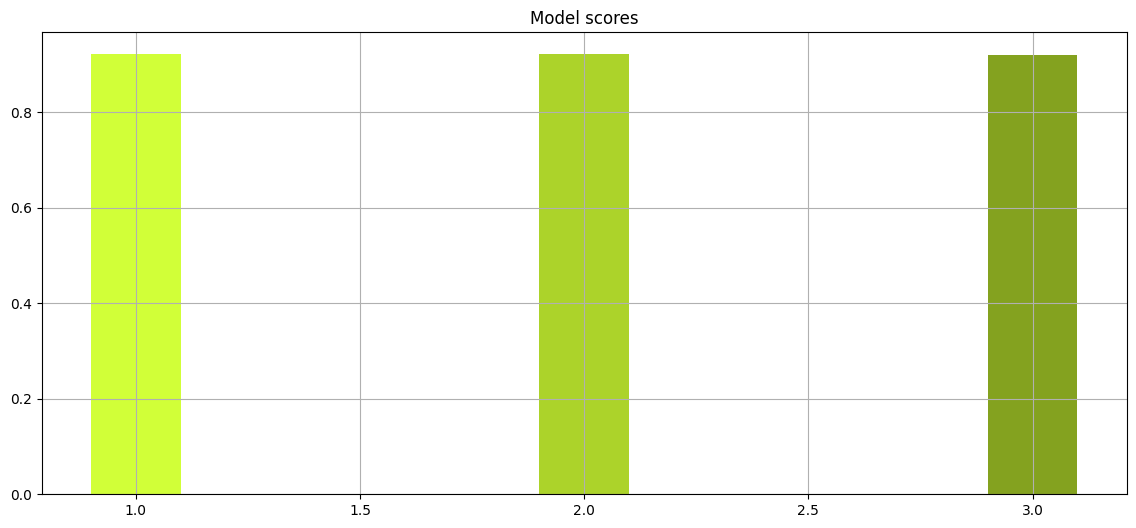

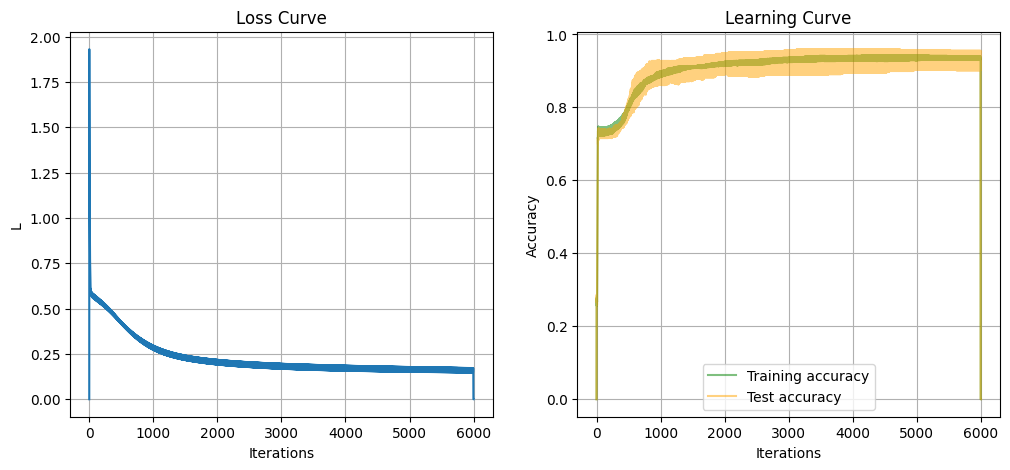

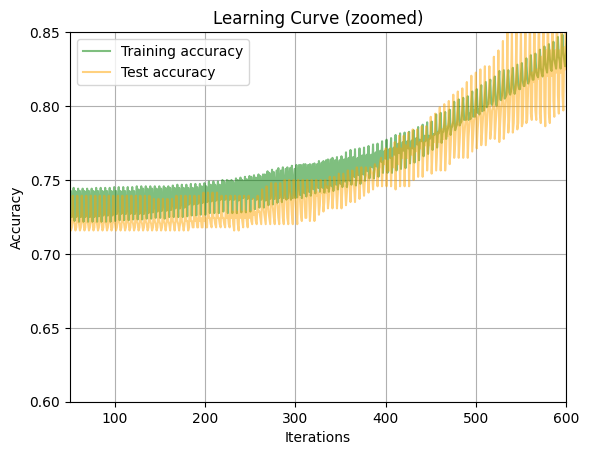

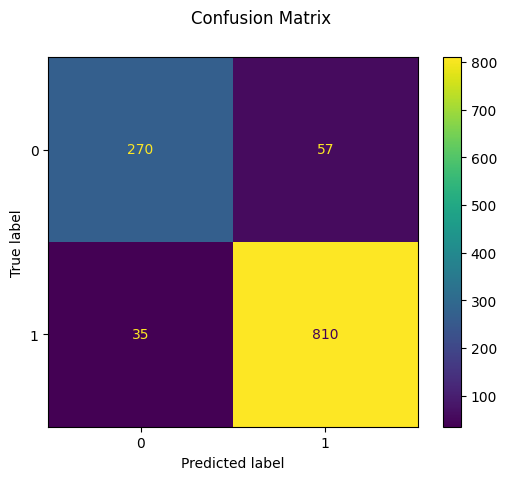

(2, 361)


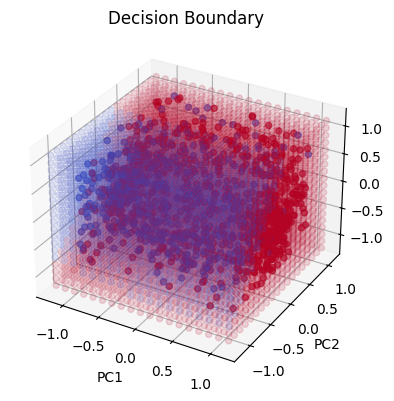

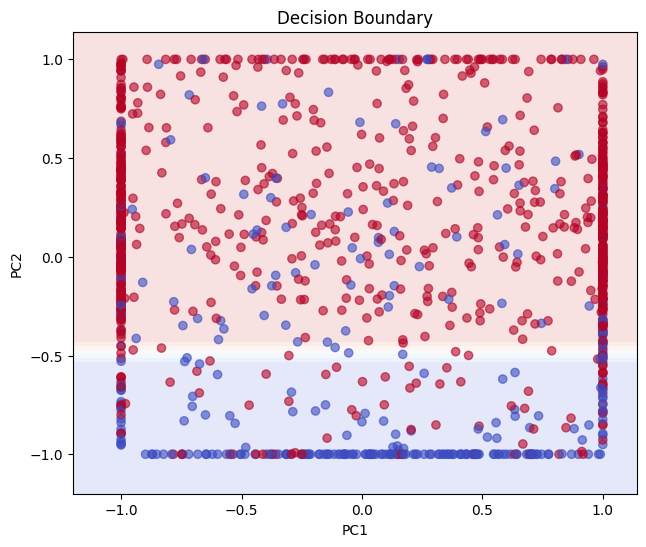

In [84]:
from local_lib.plotting import plotHist, plotDecisionBoundaries
plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))
plotDecisionBoundaries(mnn, X_test_pca_scaled, y_test_simpler_reshaped, overlap=0.1, precision=0.13, boundary_op=0.15, true_op=0.6)


**Trying to increase number of layer and neurons to see impact on decision boundary and results**

In [85]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(64,64,64,64,64), n_iter=6000, lr=0.05, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 1199/1199 [04:15<00:00,  4.70it/s]


Least accuracy :0.9325938566552902
Least recall :0.9325938566552902
Least precision :0.932314440837917


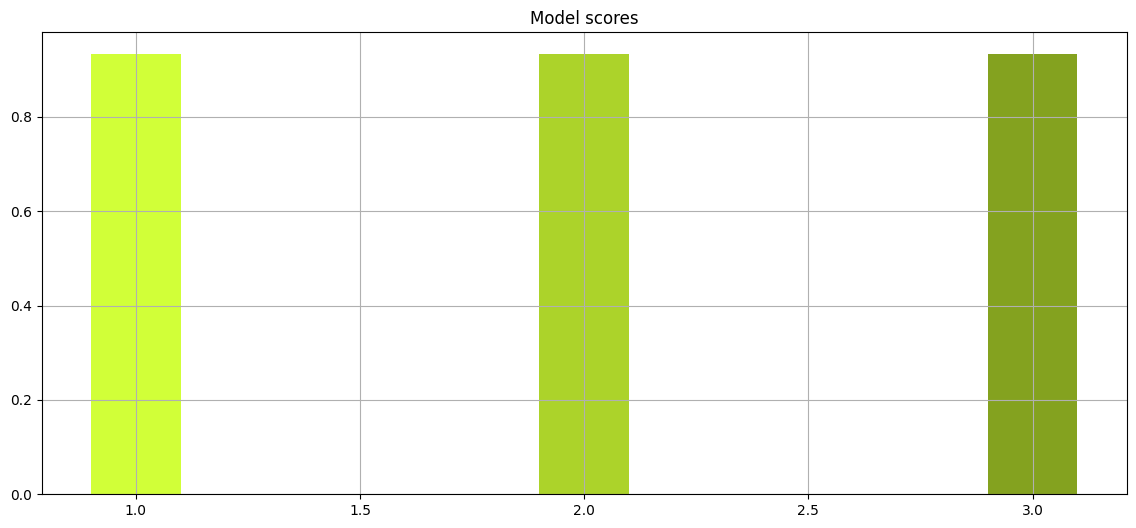

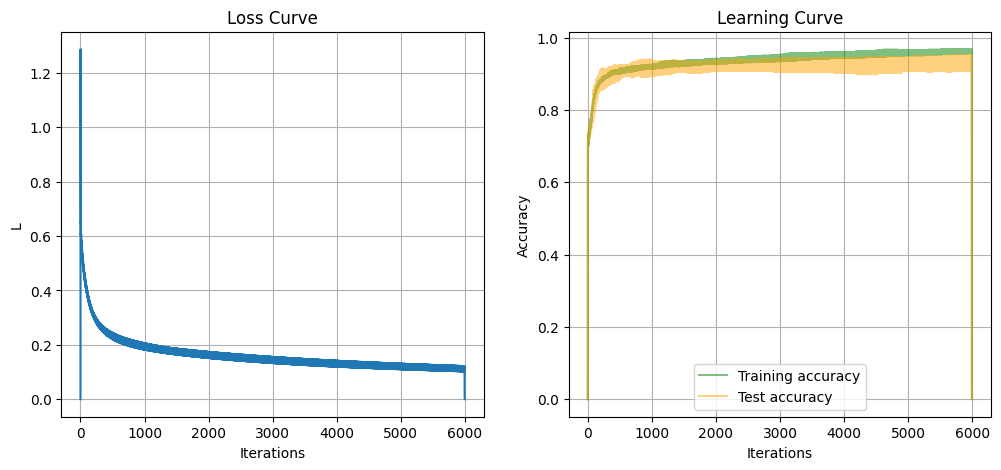

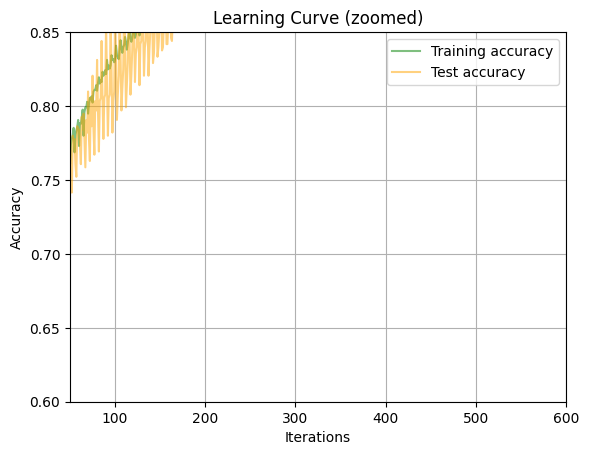

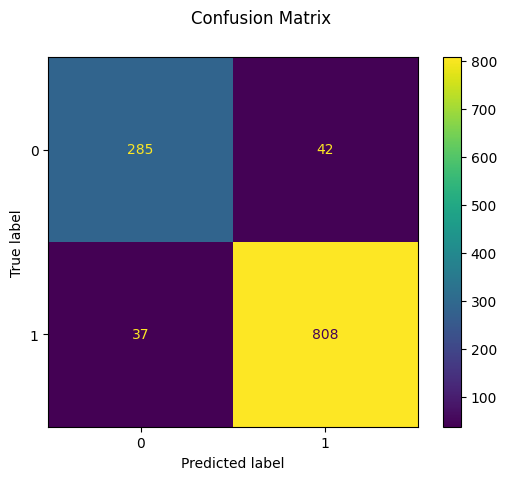

(2, 361)


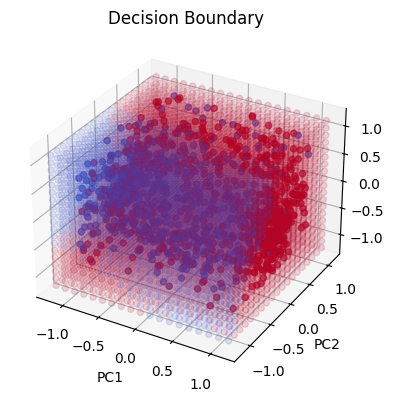

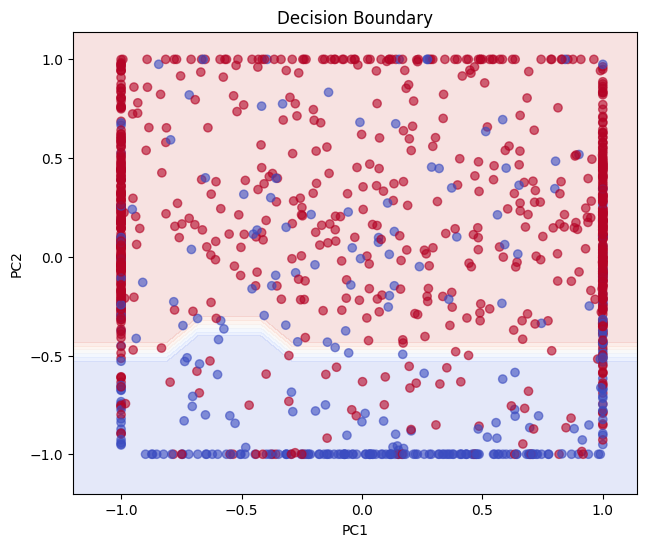

In [86]:
from local_lib.plotting import plotDecisionBoundaries, plotHist

y_pred = mnn.predict(X_test_pca_scaled)
#Number of prediction per cat
np.unique(np.argmax(y_pred, axis=0), return_counts=True)

plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))
plotDecisionBoundaries(mnn, X_test_pca_scaled, y_test_simpler_reshaped, overlap=0.1, precision=0.13, boundary_op=0.15, true_op=0.6)

**(256,256,256,256)**

In [18]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(256,256,256,256), n_iter=6000, lr=0.05, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 1199/1199 [06:34<00:00,  3.04it/s]


Least accuracy :0.91722710812209
Least recall :0.91722710812209
Least precision :0.9200325940175413


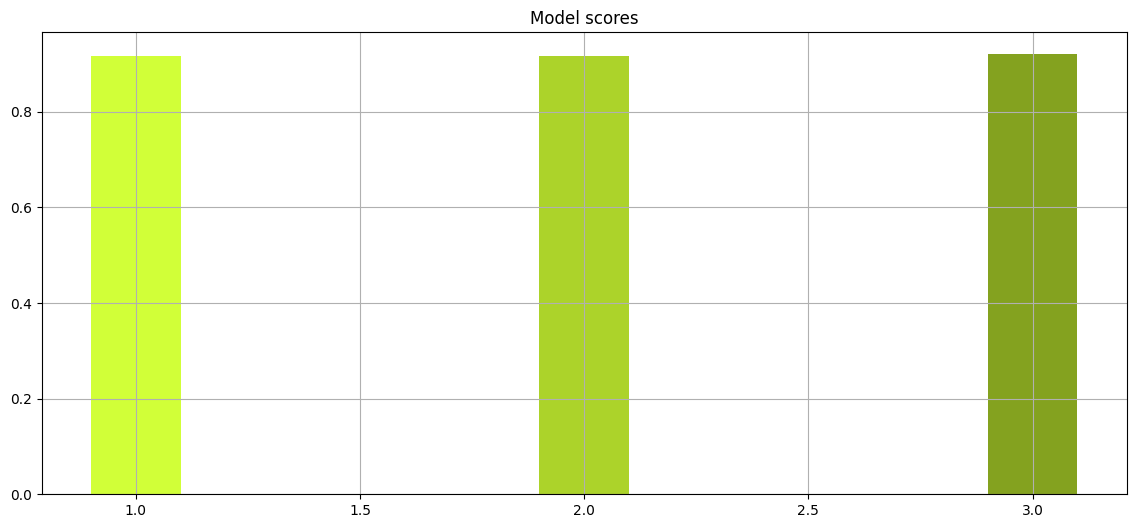

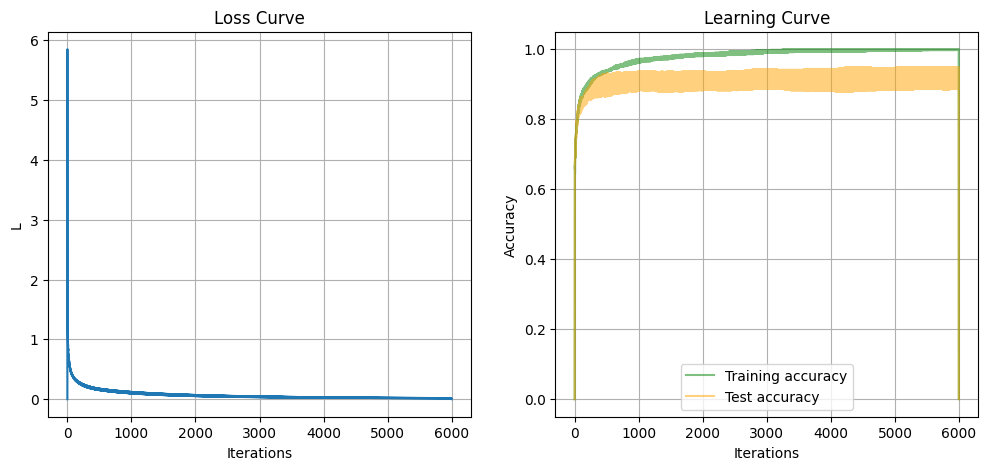

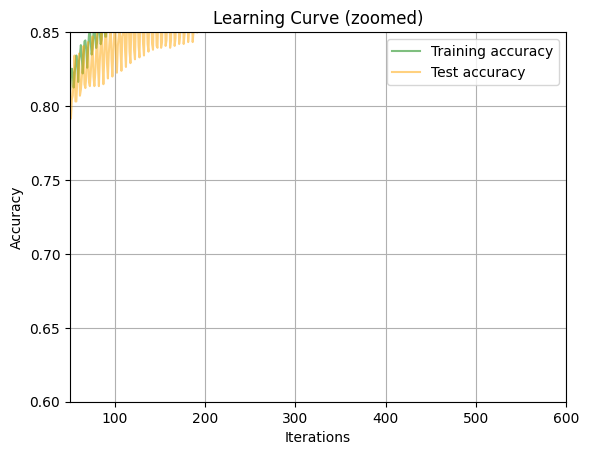

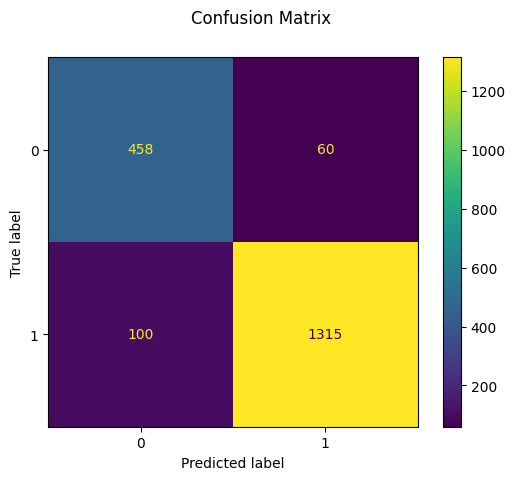

(2, 361)


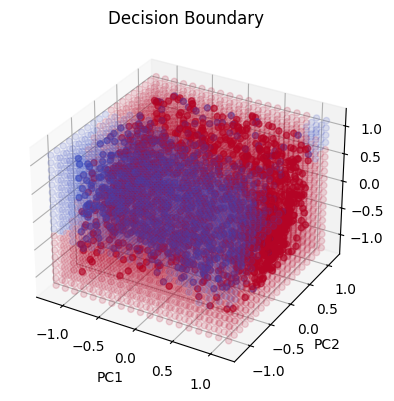

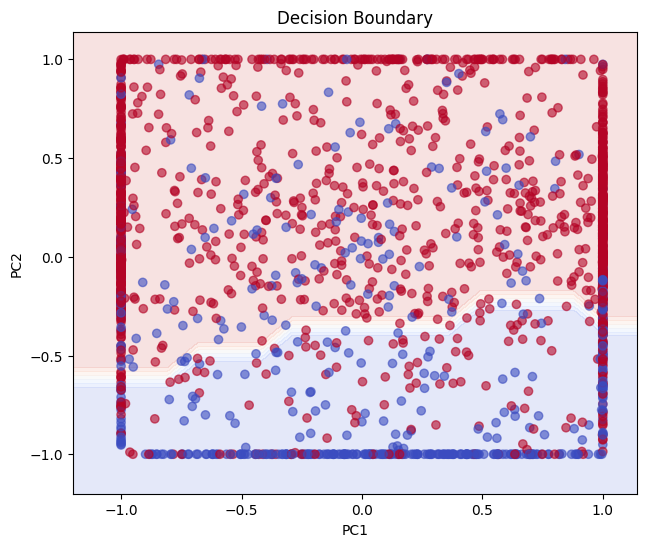

In [19]:
from local_lib.plotting import plotDecisionBoundaries, plotHist

y_pred = mnn.predict(X_test_pca_scaled)
#Number of prediction per cat
np.unique(np.argmax(y_pred, axis=0), return_counts=True)

plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))
plotDecisionBoundaries(mnn, X_test_pca_scaled, y_test_simpler_reshaped, overlap=0.1, precision=0.13, boundary_op=0.15, true_op=0.6)

**Too much neurons seems to nerf performances**

**(16,32,64,128,256)**<br>
Trying v shaped pattern to maximise divergence of prediction per neuron

In [87]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(16,32,64,128,256), n_iter=4000, lr=0.06, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 799/799 [04:03<00:00,  3.28it/s]


Least accuracy :0.9368600682593856
Least recall :0.9368600682593856
Least precision :0.9365584531850638


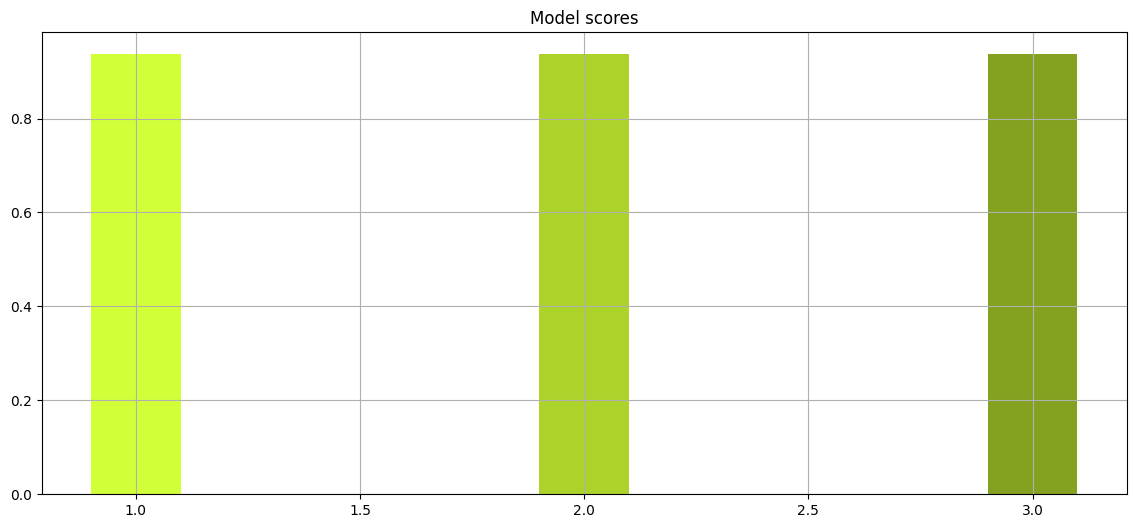

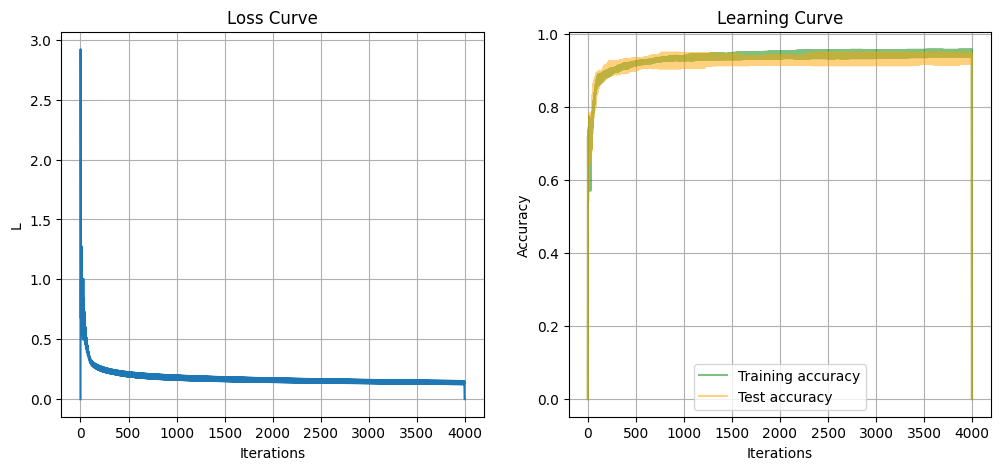

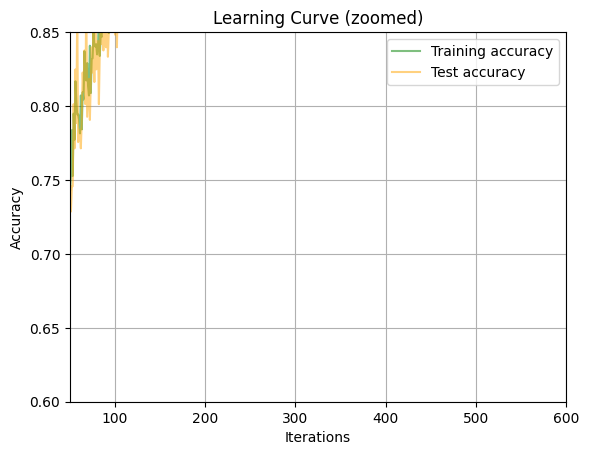

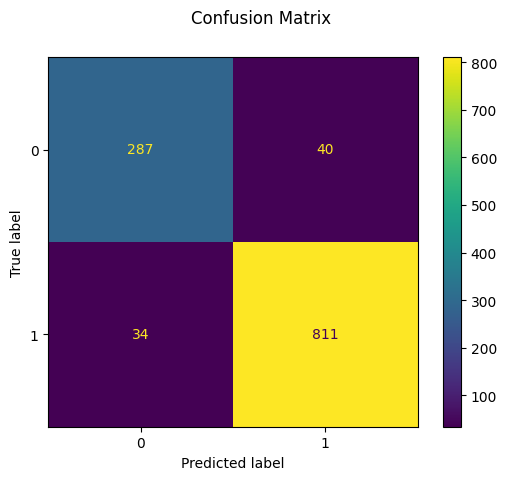

(2, 361)


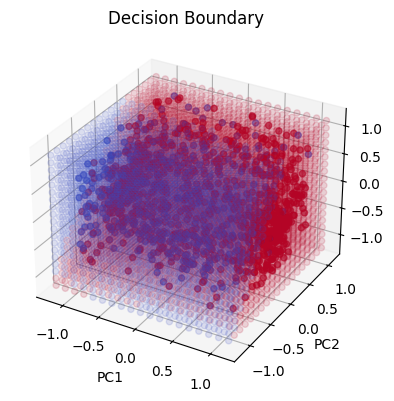

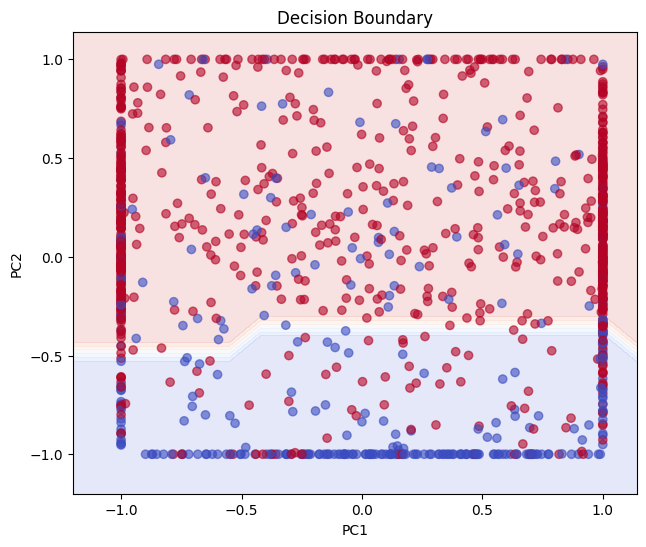

In [88]:
from local_lib.plotting import plotDecisionBoundaries, plotHist

y_pred = mnn.predict(X_test_pca_scaled)
#Number of prediction per cat
np.unique(np.argmax(y_pred, axis=0), return_counts=True)

plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))
plotDecisionBoundaries(mnn, X_test_pca_scaled, y_test_simpler_reshaped, overlap=0.1, precision=0.13, boundary_op=0.15, true_op=0.6)

V-shaped layers seems to work well<br>
**(64,128,256,512,1024)**

In [23]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(64,128,256,512,1024), n_iter=4000, lr=0.06, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 799/799 [10:12<00:00,  1.30it/s]


Least accuracy :0.9120538023797207
Least recall :0.9120538023797207
Least precision :0.9155329737075256


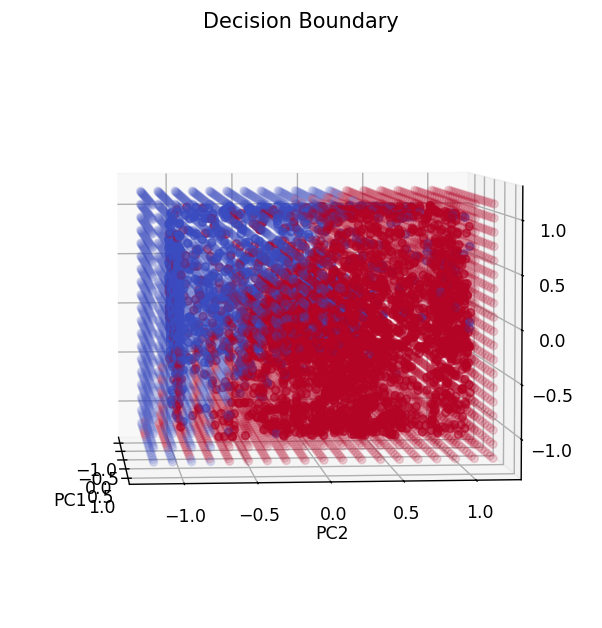

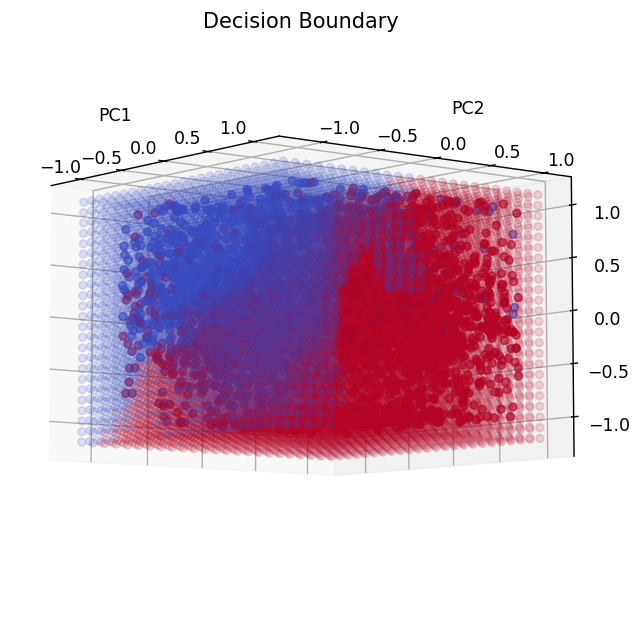

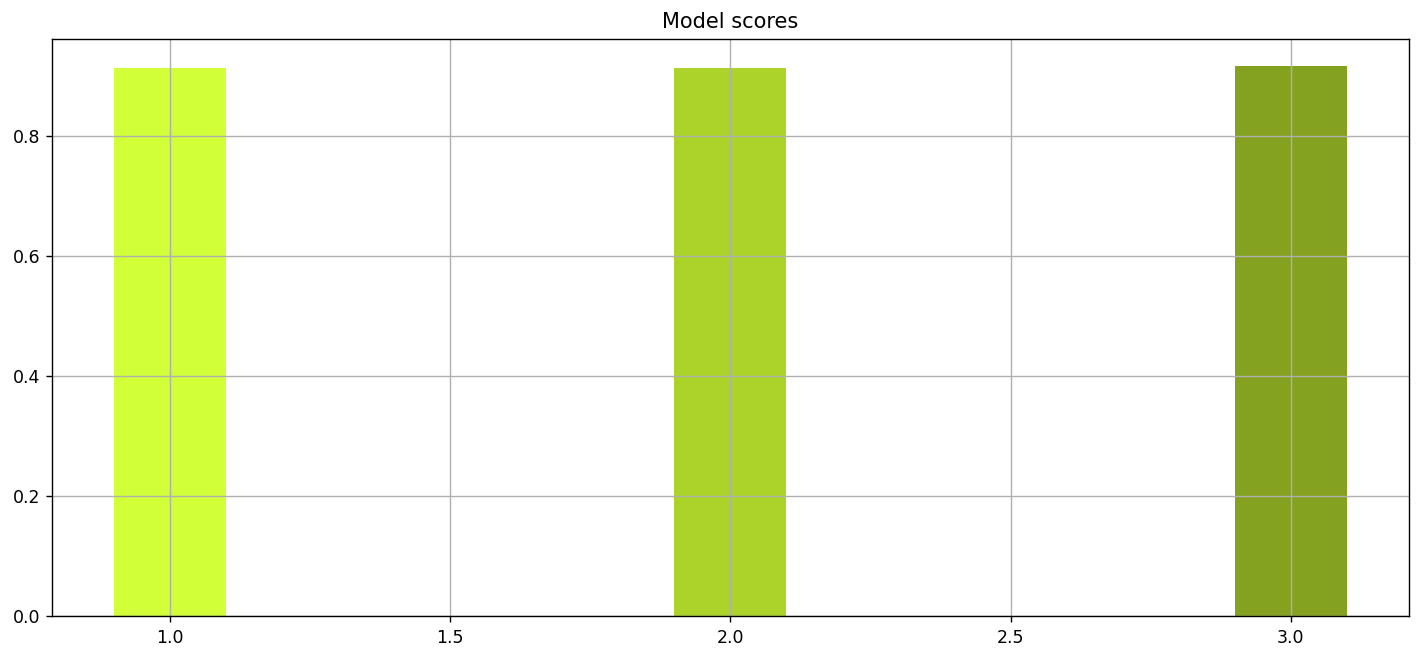

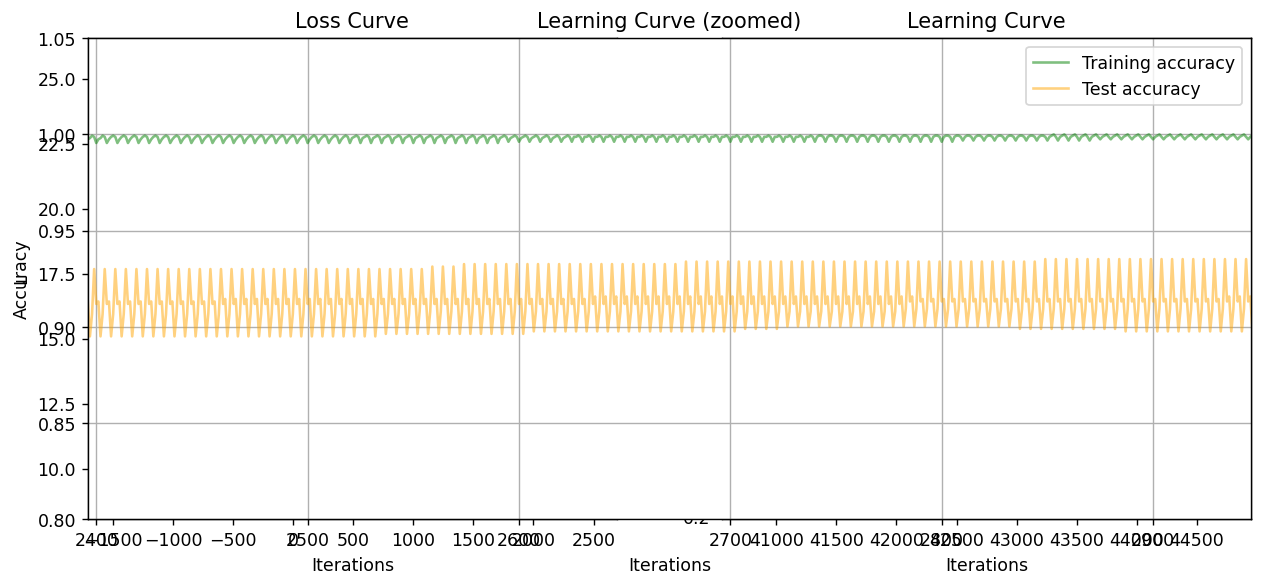

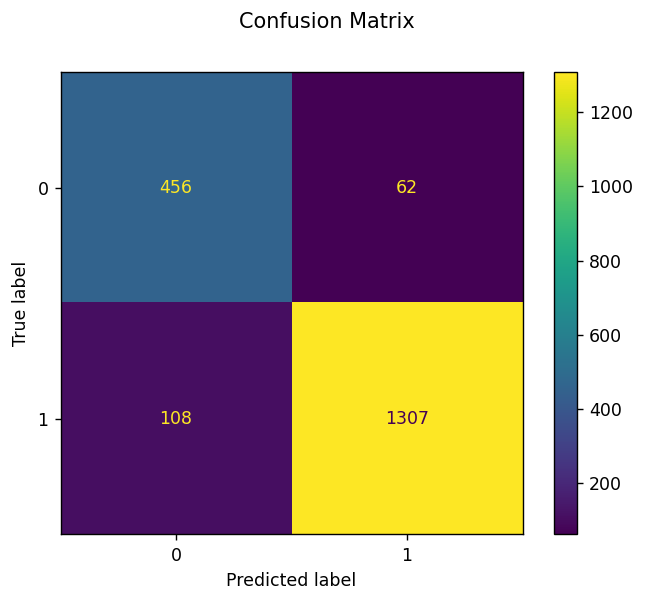

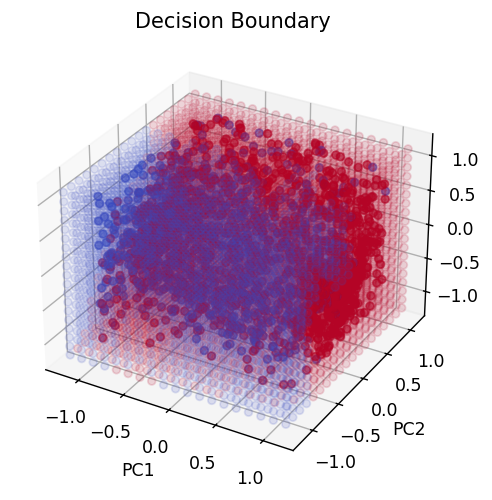

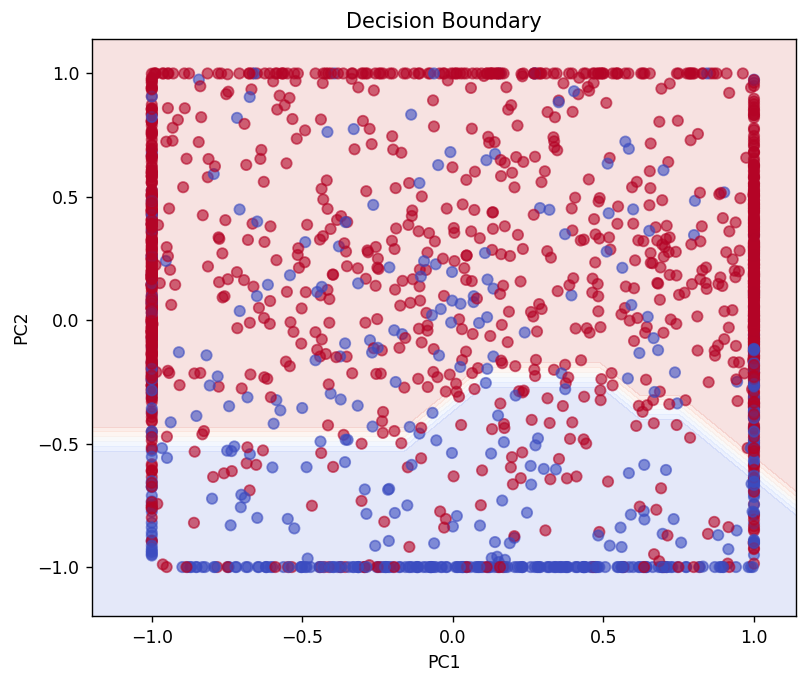

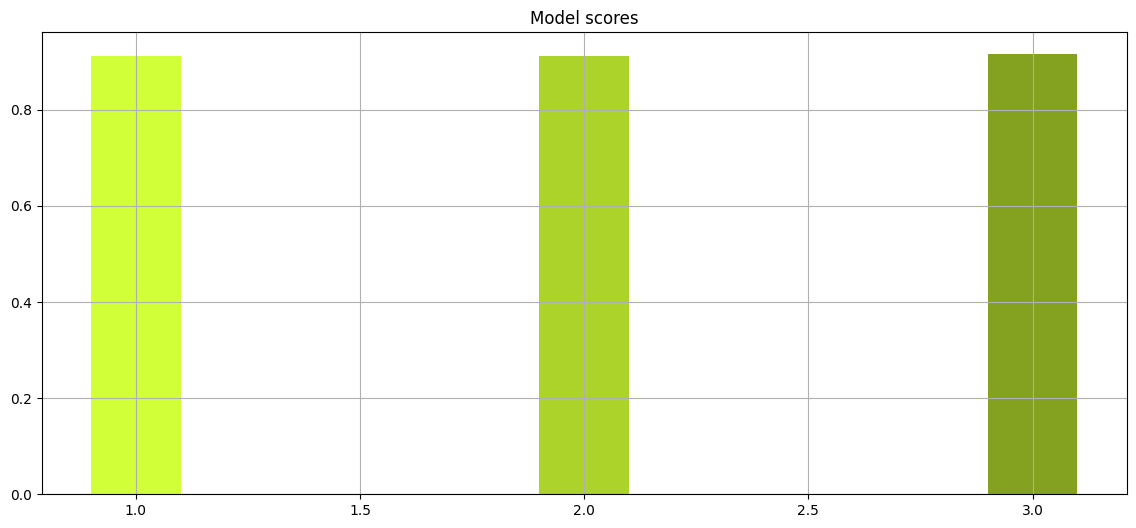

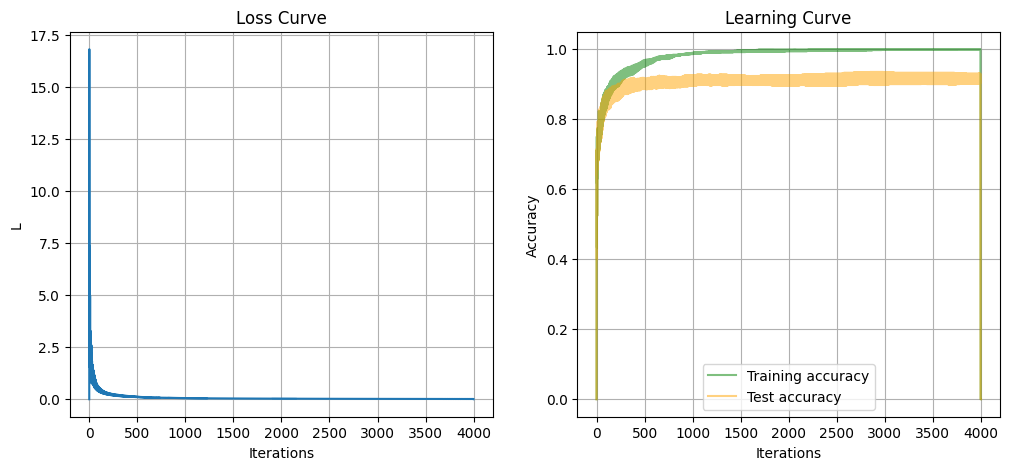

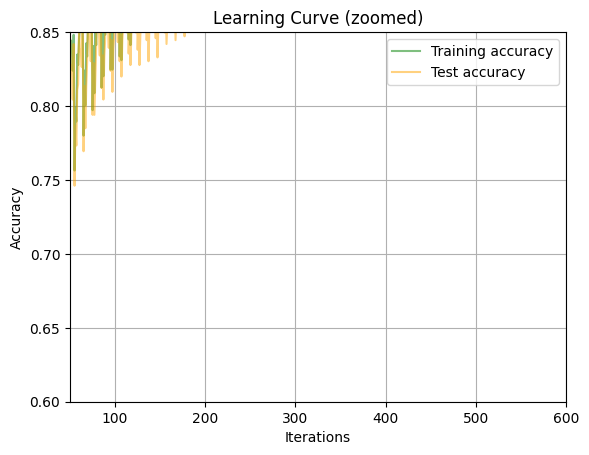

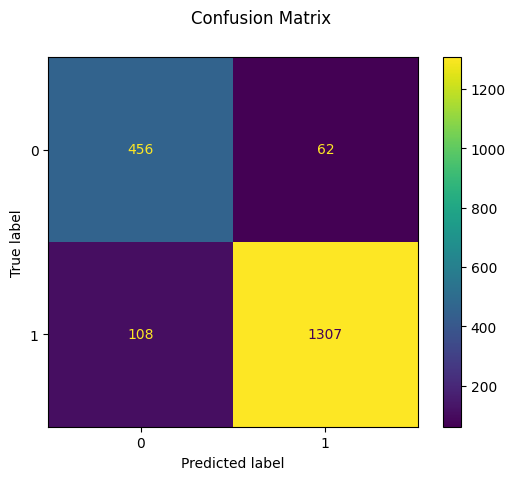

(2, 361)


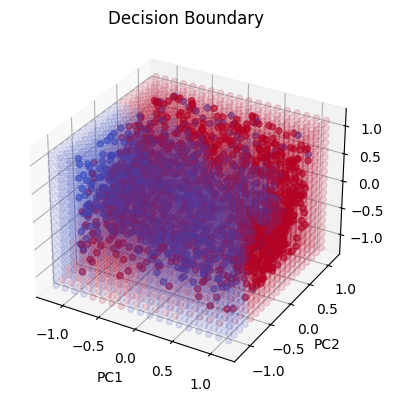

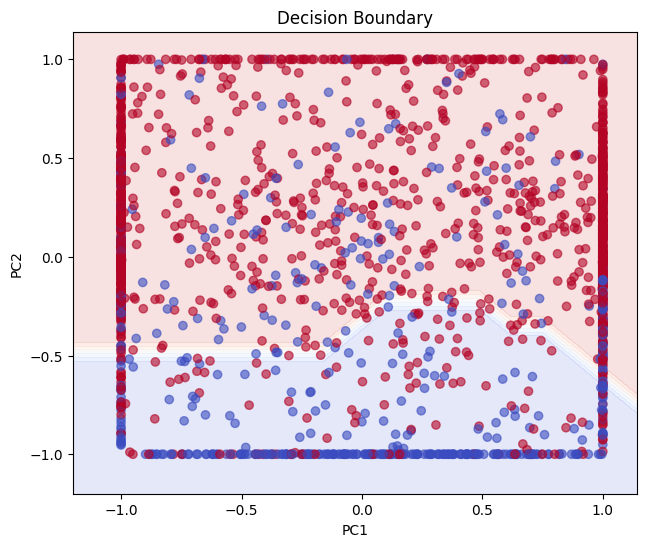

In [32]:
from local_lib.plotting import plotDecisionBoundaries, plotHist

y_pred = mnn.predict(X_test_pca_scaled)

plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))
plotDecisionBoundaries(mnn, X_test_pca_scaled, y_test_simpler_reshaped, overlap=0.1, precision=0.13, boundary_op=0.15, true_op=0.6)

Again, increasing number of neurons is not benefic

**(256, 128, 64, 32, 16)**<br>
Inversed V-shaped layers

In [89]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(256, 128, 64, 32, 16), n_iter=2500, lr=0.07, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 499/499 [02:50<00:00,  2.92it/s]


Least accuracy :0.9232081911262798
Least recall :0.9232081911262798
Least precision :0.9232081911262798


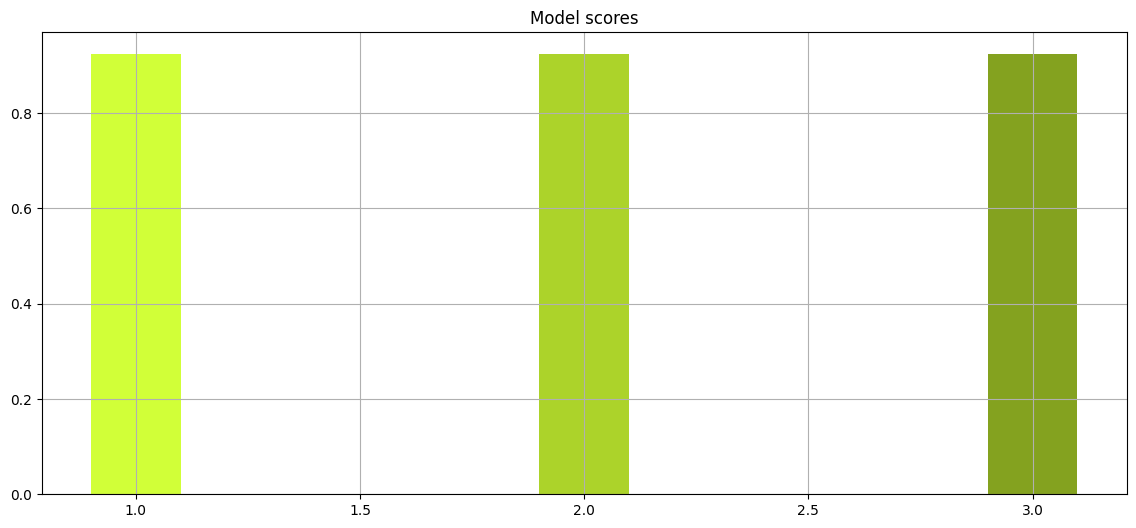

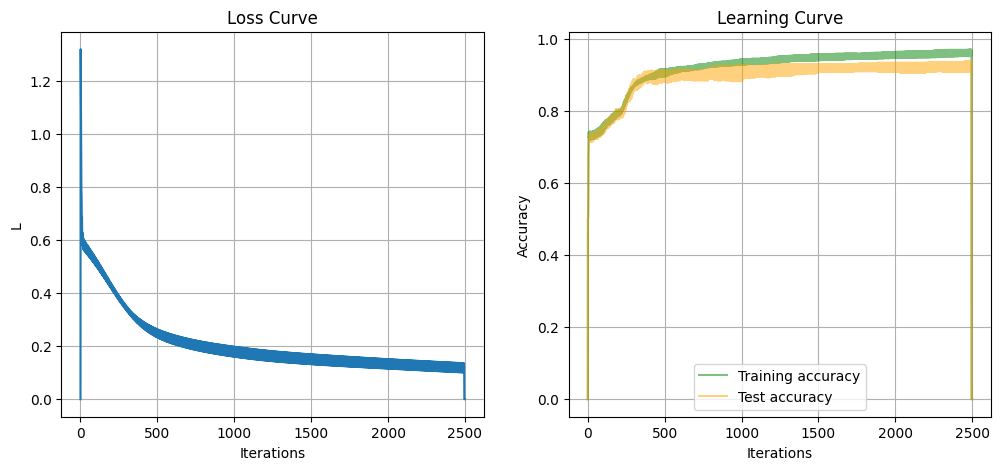

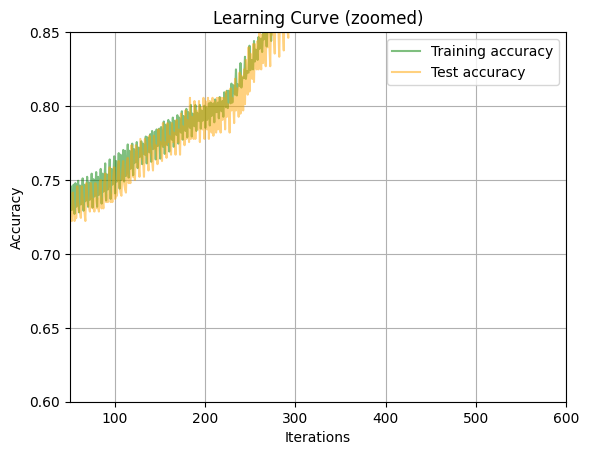

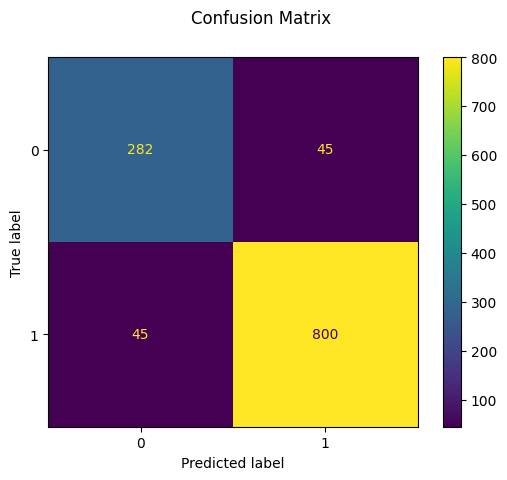

(2, 361)


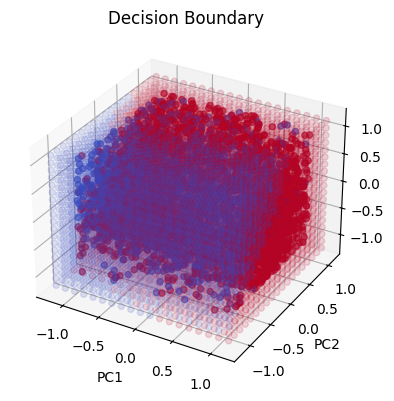

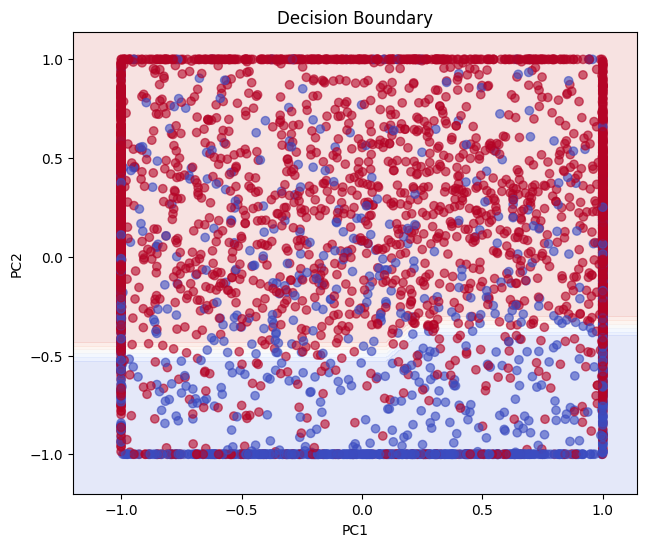

In [90]:
from local_lib.plotting import plotDecisionBoundaries, plotHist

y_pred = mnn.predict(X_test_pca_scaled)

plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))
plotDecisionBoundaries(mnn, X_train_pca_scaled, y_train_simpler_reshaped, overlap=0.1, precision=0.13, boundary_op=0.15, true_op=0.6)

**(64,8,64)**

In [91]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(64,8,64), n_iter=2500, lr=0.07, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 499/499 [00:43<00:00, 11.43it/s]


Least accuracy :0.9300341296928327
Least recall :0.9300341296928327
Least precision :0.9296927840383218


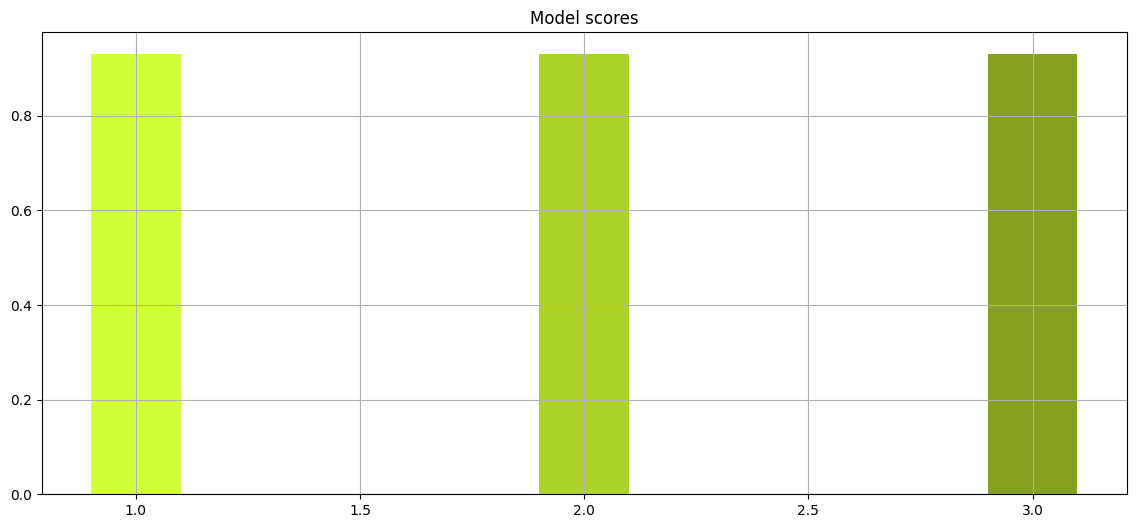

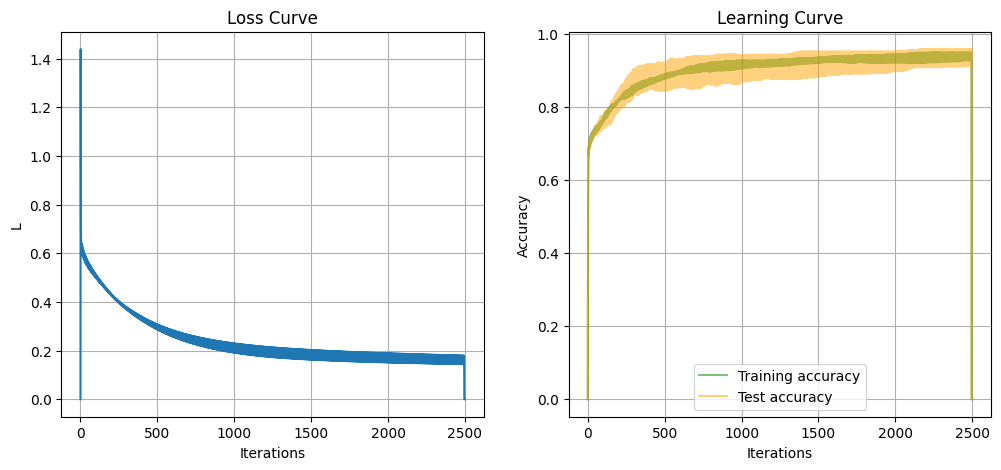

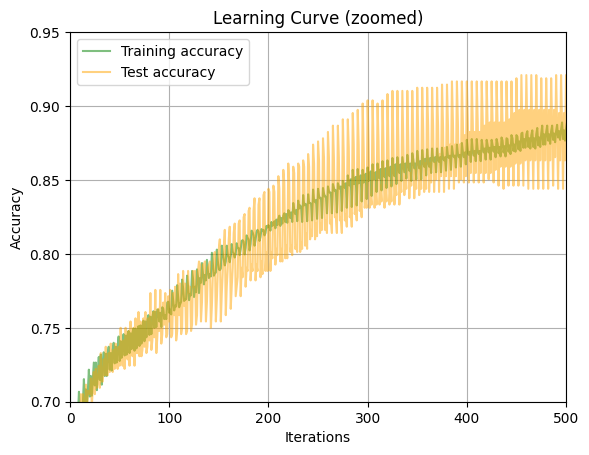

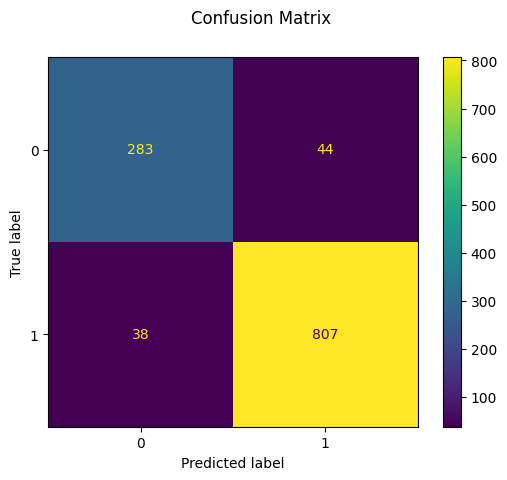

(2, 361)


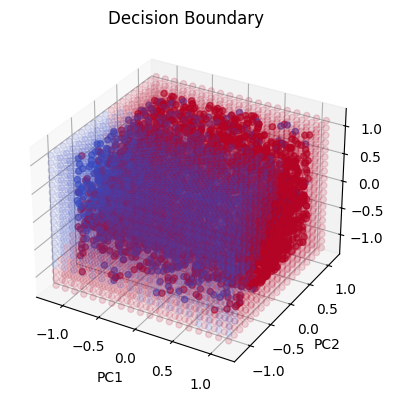

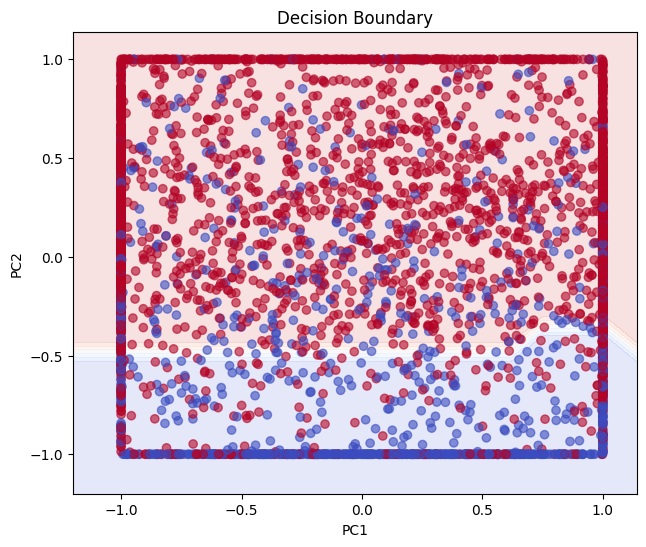

In [93]:
from local_lib.plotting import plotDecisionBoundaries, plotHist

y_pred = mnn.predict(X_test_pca_scaled)

plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(0,500), zoomy=(0.7,0.95))
plotDecisionBoundaries(mnn, X_train_pca_scaled, y_train_simpler_reshaped, overlap=0.1, precision=0.13, boundary_op=0.15, true_op=0.6)

In [94]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(8,8), n_iter=2800, lr=0.1, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 559/559 [00:12<00:00, 44.26it/s]


Least accuracy :0.9215017064846417
Least recall :0.9215017064846417
Least precision :0.9206414857169143


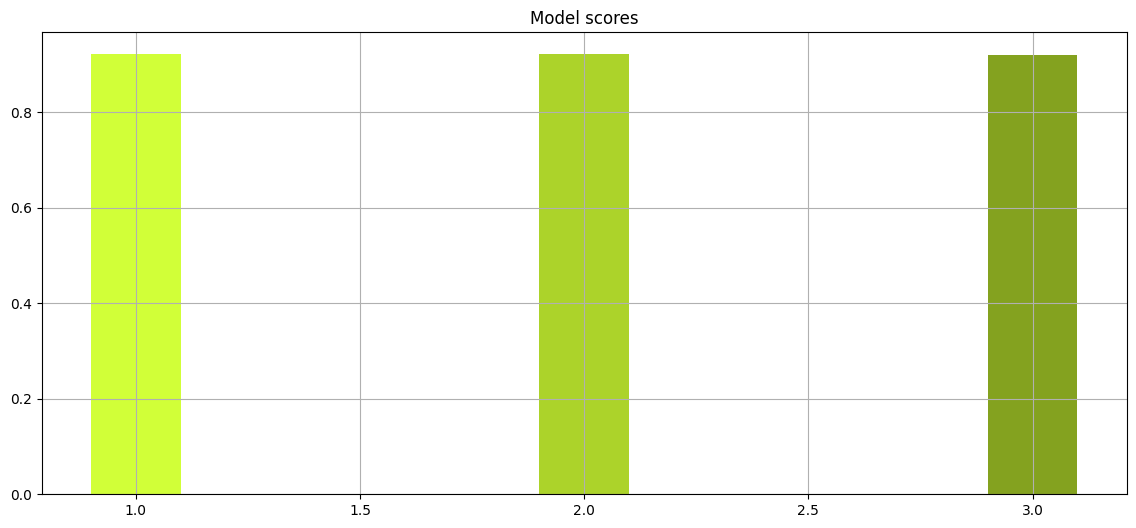

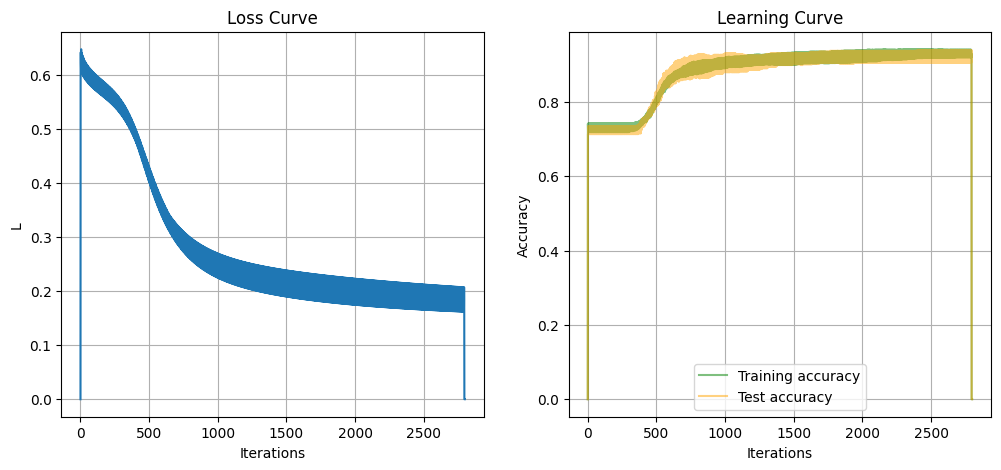

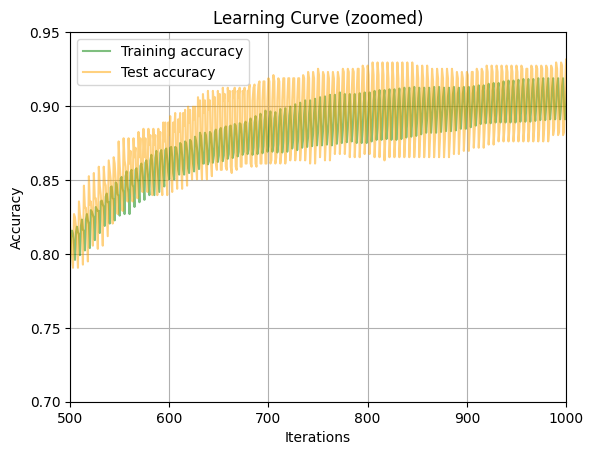

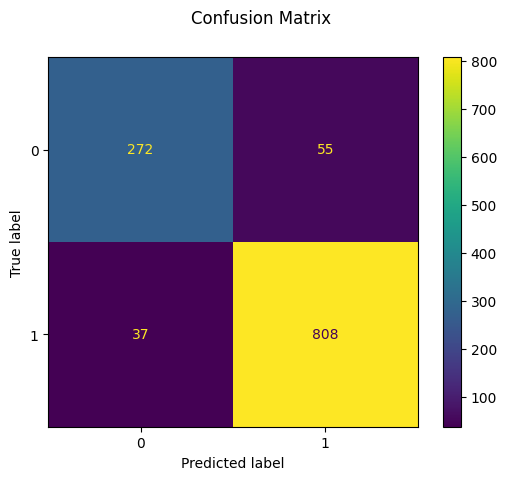

(2, 361)


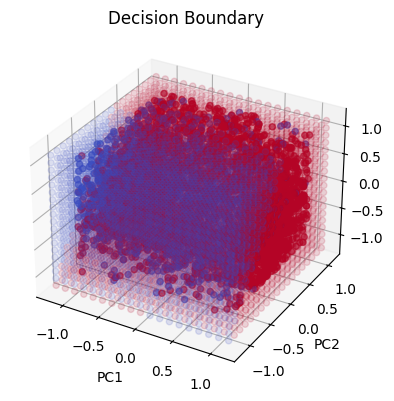

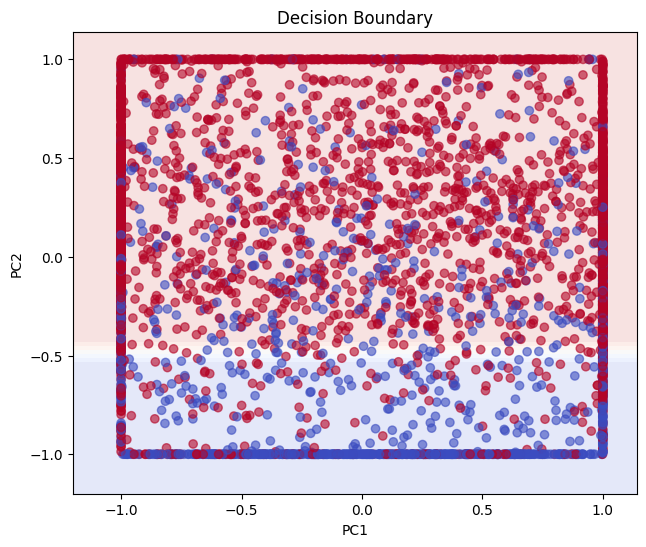

In [95]:
from local_lib.plotting import plotDecisionBoundaries, plotHist

y_pred = mnn.predict(X_test_pca_scaled)

plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(500,1000), zoomy=(0.7,0.95))
plotDecisionBoundaries(mnn, X_train_pca_scaled, y_train_simpler_reshaped, overlap=0.1, precision=0.13, boundary_op=0.15, true_op=0.6)

Regardless of the setup of hidden layers we seems to reach a plateau at 90% accuracy on test set<br>
**Trying MinMaxScaler**

In [96]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('MinMaxScaler', MinMaxScaler())])

X_train_pca_scaled = pipeline.fit_transform(X_train_pca)
X_test_pca_scaled = pipeline.fit_transform(X_test_pca)
print(X_train_pca_scaled.shape)
print(X_test_pca_scaled.shape)

(50, 4684)
(50, 1172)


**(8,8)**

In [97]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(8,8), n_iter=2800, lr=0.1, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 559/559 [00:18<00:00, 30.69it/s]


Least accuracy :0.9197952218430034
Least recall :0.9197952218430034
Least precision :0.9188630508723343


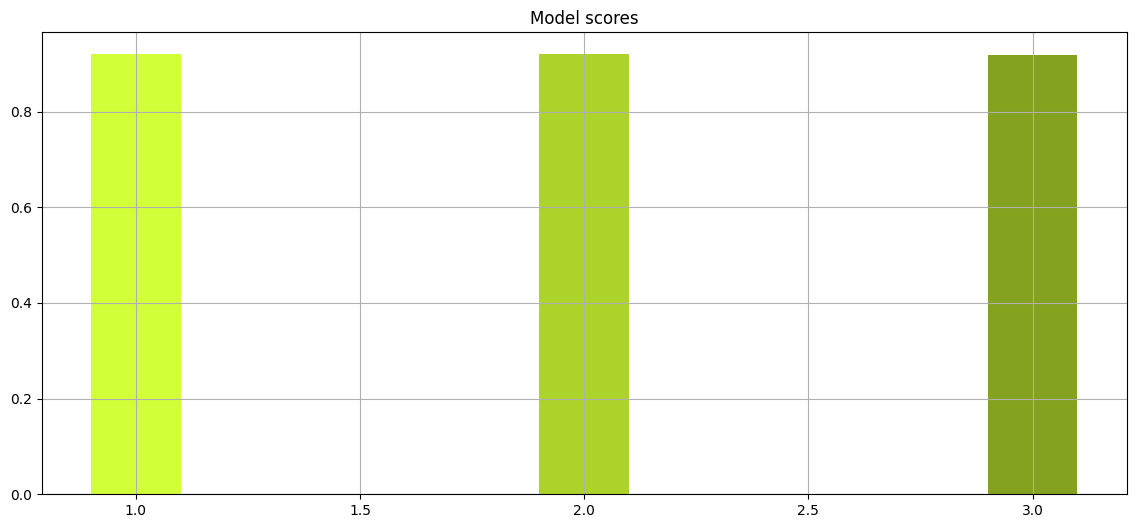

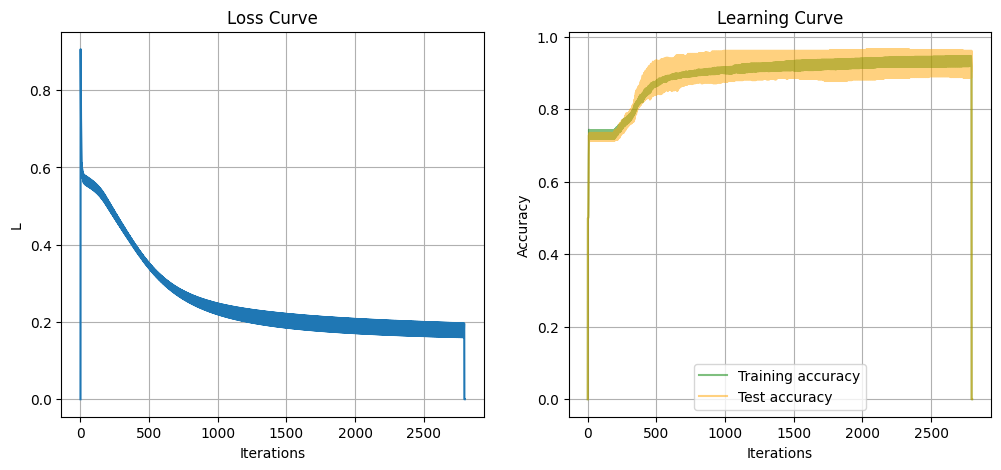

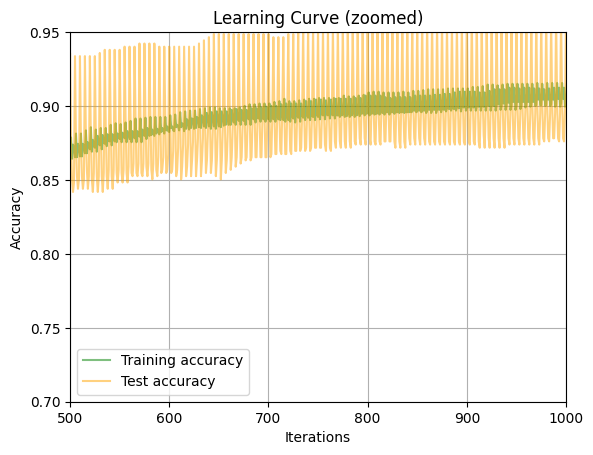

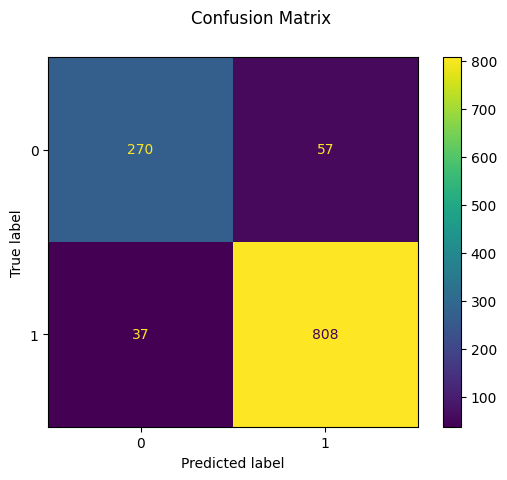

(2, 256)


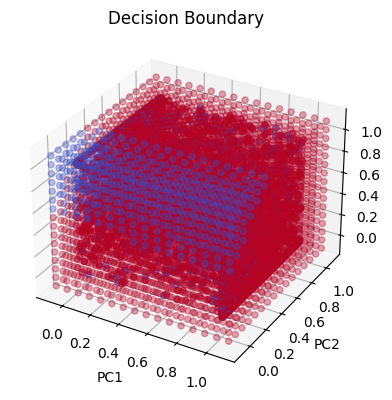

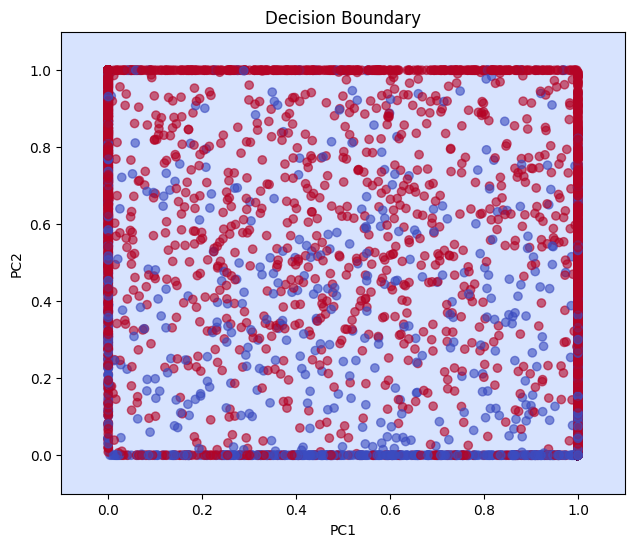

In [98]:
from local_lib.plotting import plotDecisionBoundaries, plotHist

y_pred = mnn.predict(X_test_pca_scaled)

plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(500,1000), zoomy=(0.7,0.95))
plotDecisionBoundaries(mnn, X_train_pca_scaled, y_train_simpler_reshaped, overlap=0.1, precision=0.08, boundary_op=0.35, true_op=0.6)

**(16,32,64,128,256)**

In [99]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_pca_scaled, y_train_simpler_reshaped, dimensions=(16,32,64,128,256), n_iter=4000, lr=0.06, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_pca_scaled, X_test_pca_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

100%|██████████| 799/799 [04:35<00:00,  2.90it/s]


Least accuracy :0.9266211604095563
Least recall :0.9266211604095563
Least precision :0.9280746553587825


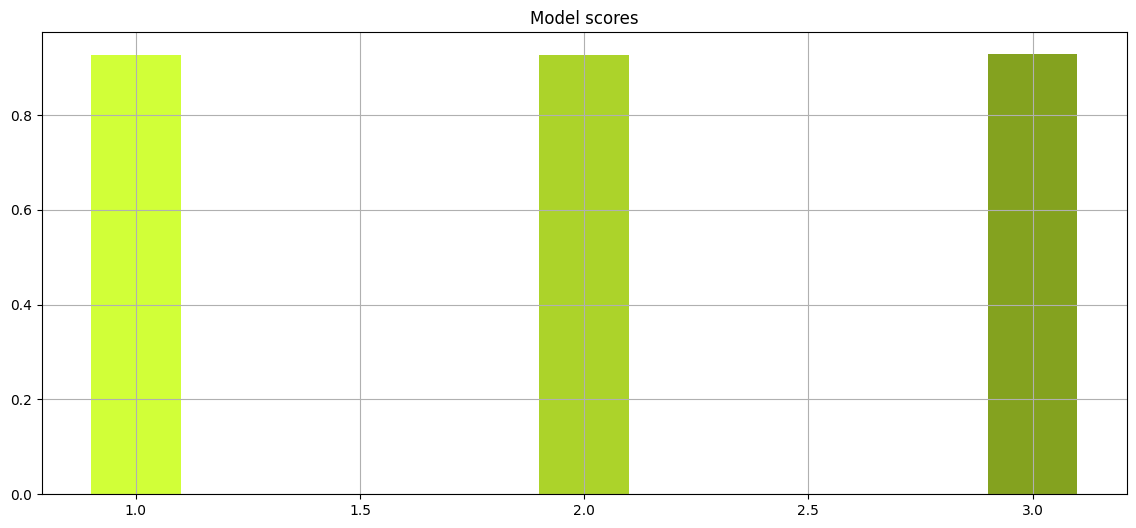

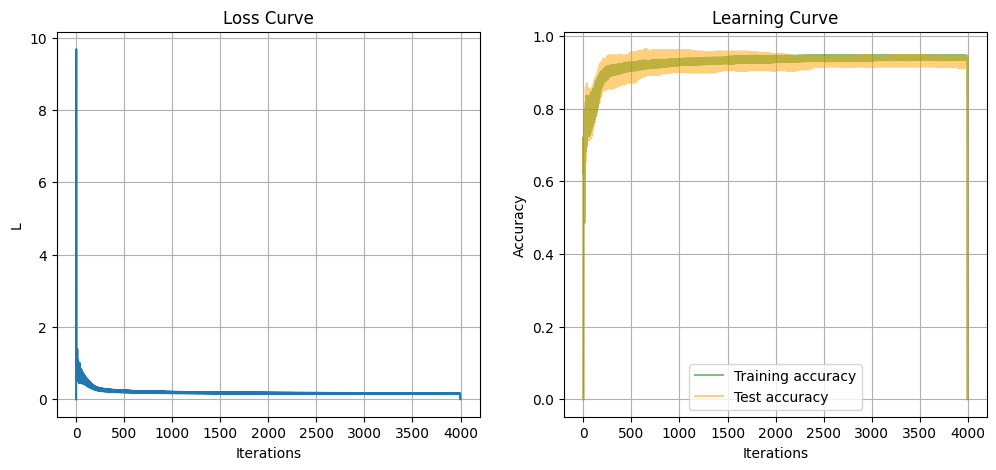

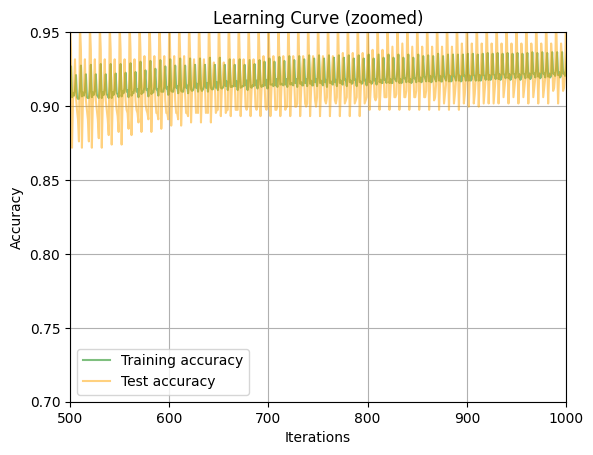

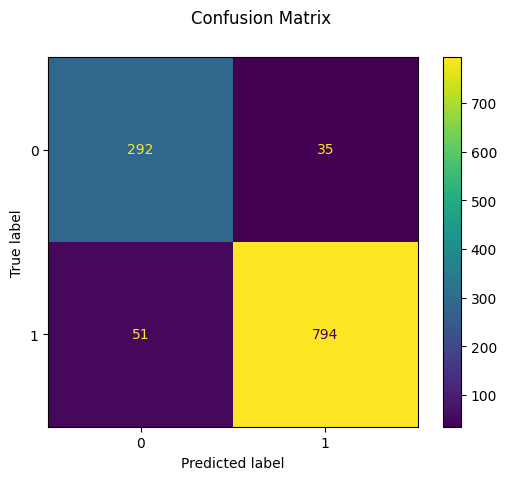

(2, 289)


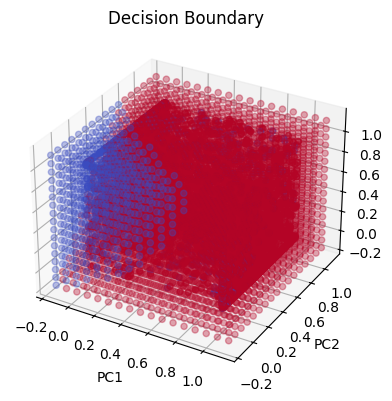

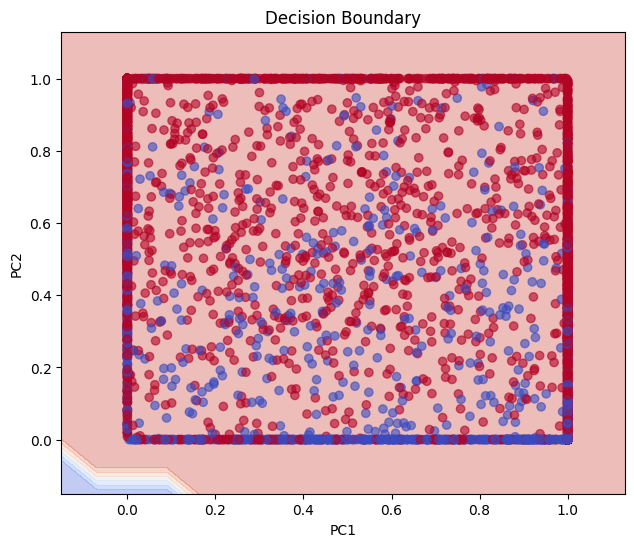

In [102]:
from local_lib.plotting import plotDecisionBoundaries, plotHist

y_pred = mnn.predict(X_test_pca_scaled)

plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(500,1000), zoomy=(0.7,0.95))
plotDecisionBoundaries(mnn, X_train_pca_scaled, y_train_simpler_reshaped, overlap=0.15, precision=0.08, boundary_op=0.35, true_op=0.6)